In [81]:
import os,shutil

In [82]:
shutil.unpack_archive('../data/xmls.zip', '../data')
os.remove('../data/xmls.zip')

In [4]:
import numpy as np
import matplotlib, imgaug, cv2, time, re, math, random, sys, os, shutil
import matplotlib.pyplot as plt

ROOT_DIR = os.path.abspath("../")

sys.path.append(ROOT_DIR)  # To find local version of the library

from mmrcnn.config import Config
import tqdm
from mmrcnn import model as modellib,utils,visualize
from mmrcnn.model import log

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

DEFAULT_WEIGHTS = os.path.join(ROOT_DIR, "mobile_mask_rcnn_coco.h5")

from mmrcnn.visualize import display_instances
from mmrcnn.config  import Config
from mmrcnn.visualize import display_instances
from mmrcnn.utils import extract_bboxes
from mmrcnn.utils import compute_ap
from mmrcnn.model import load_image_gt
from mmrcnn.model import mold_image

/home/sm/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sm/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sm/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sm/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [8]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'sRGB' 41 1
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 54 473761


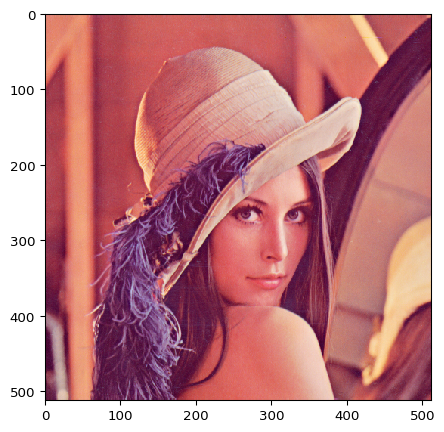

In [9]:
import imageio, imgaug

image = imageio.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
imgaug.imshow(image)


In [73]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
#     iaa.Fliplr(0.5),
    iaa.Rot90(k=0)
])

In [74]:
import numpy
numpy.random.bit_generator = numpy.random._bit_generator

In [75]:
import imgaug as ia
bbs = [ia.BoundingBox(x1=90, y1=180, x2=180, y2=512, label='pero')]
images_aug, bbs_aug = seq(images=[image], bounding_boxes=bbs)

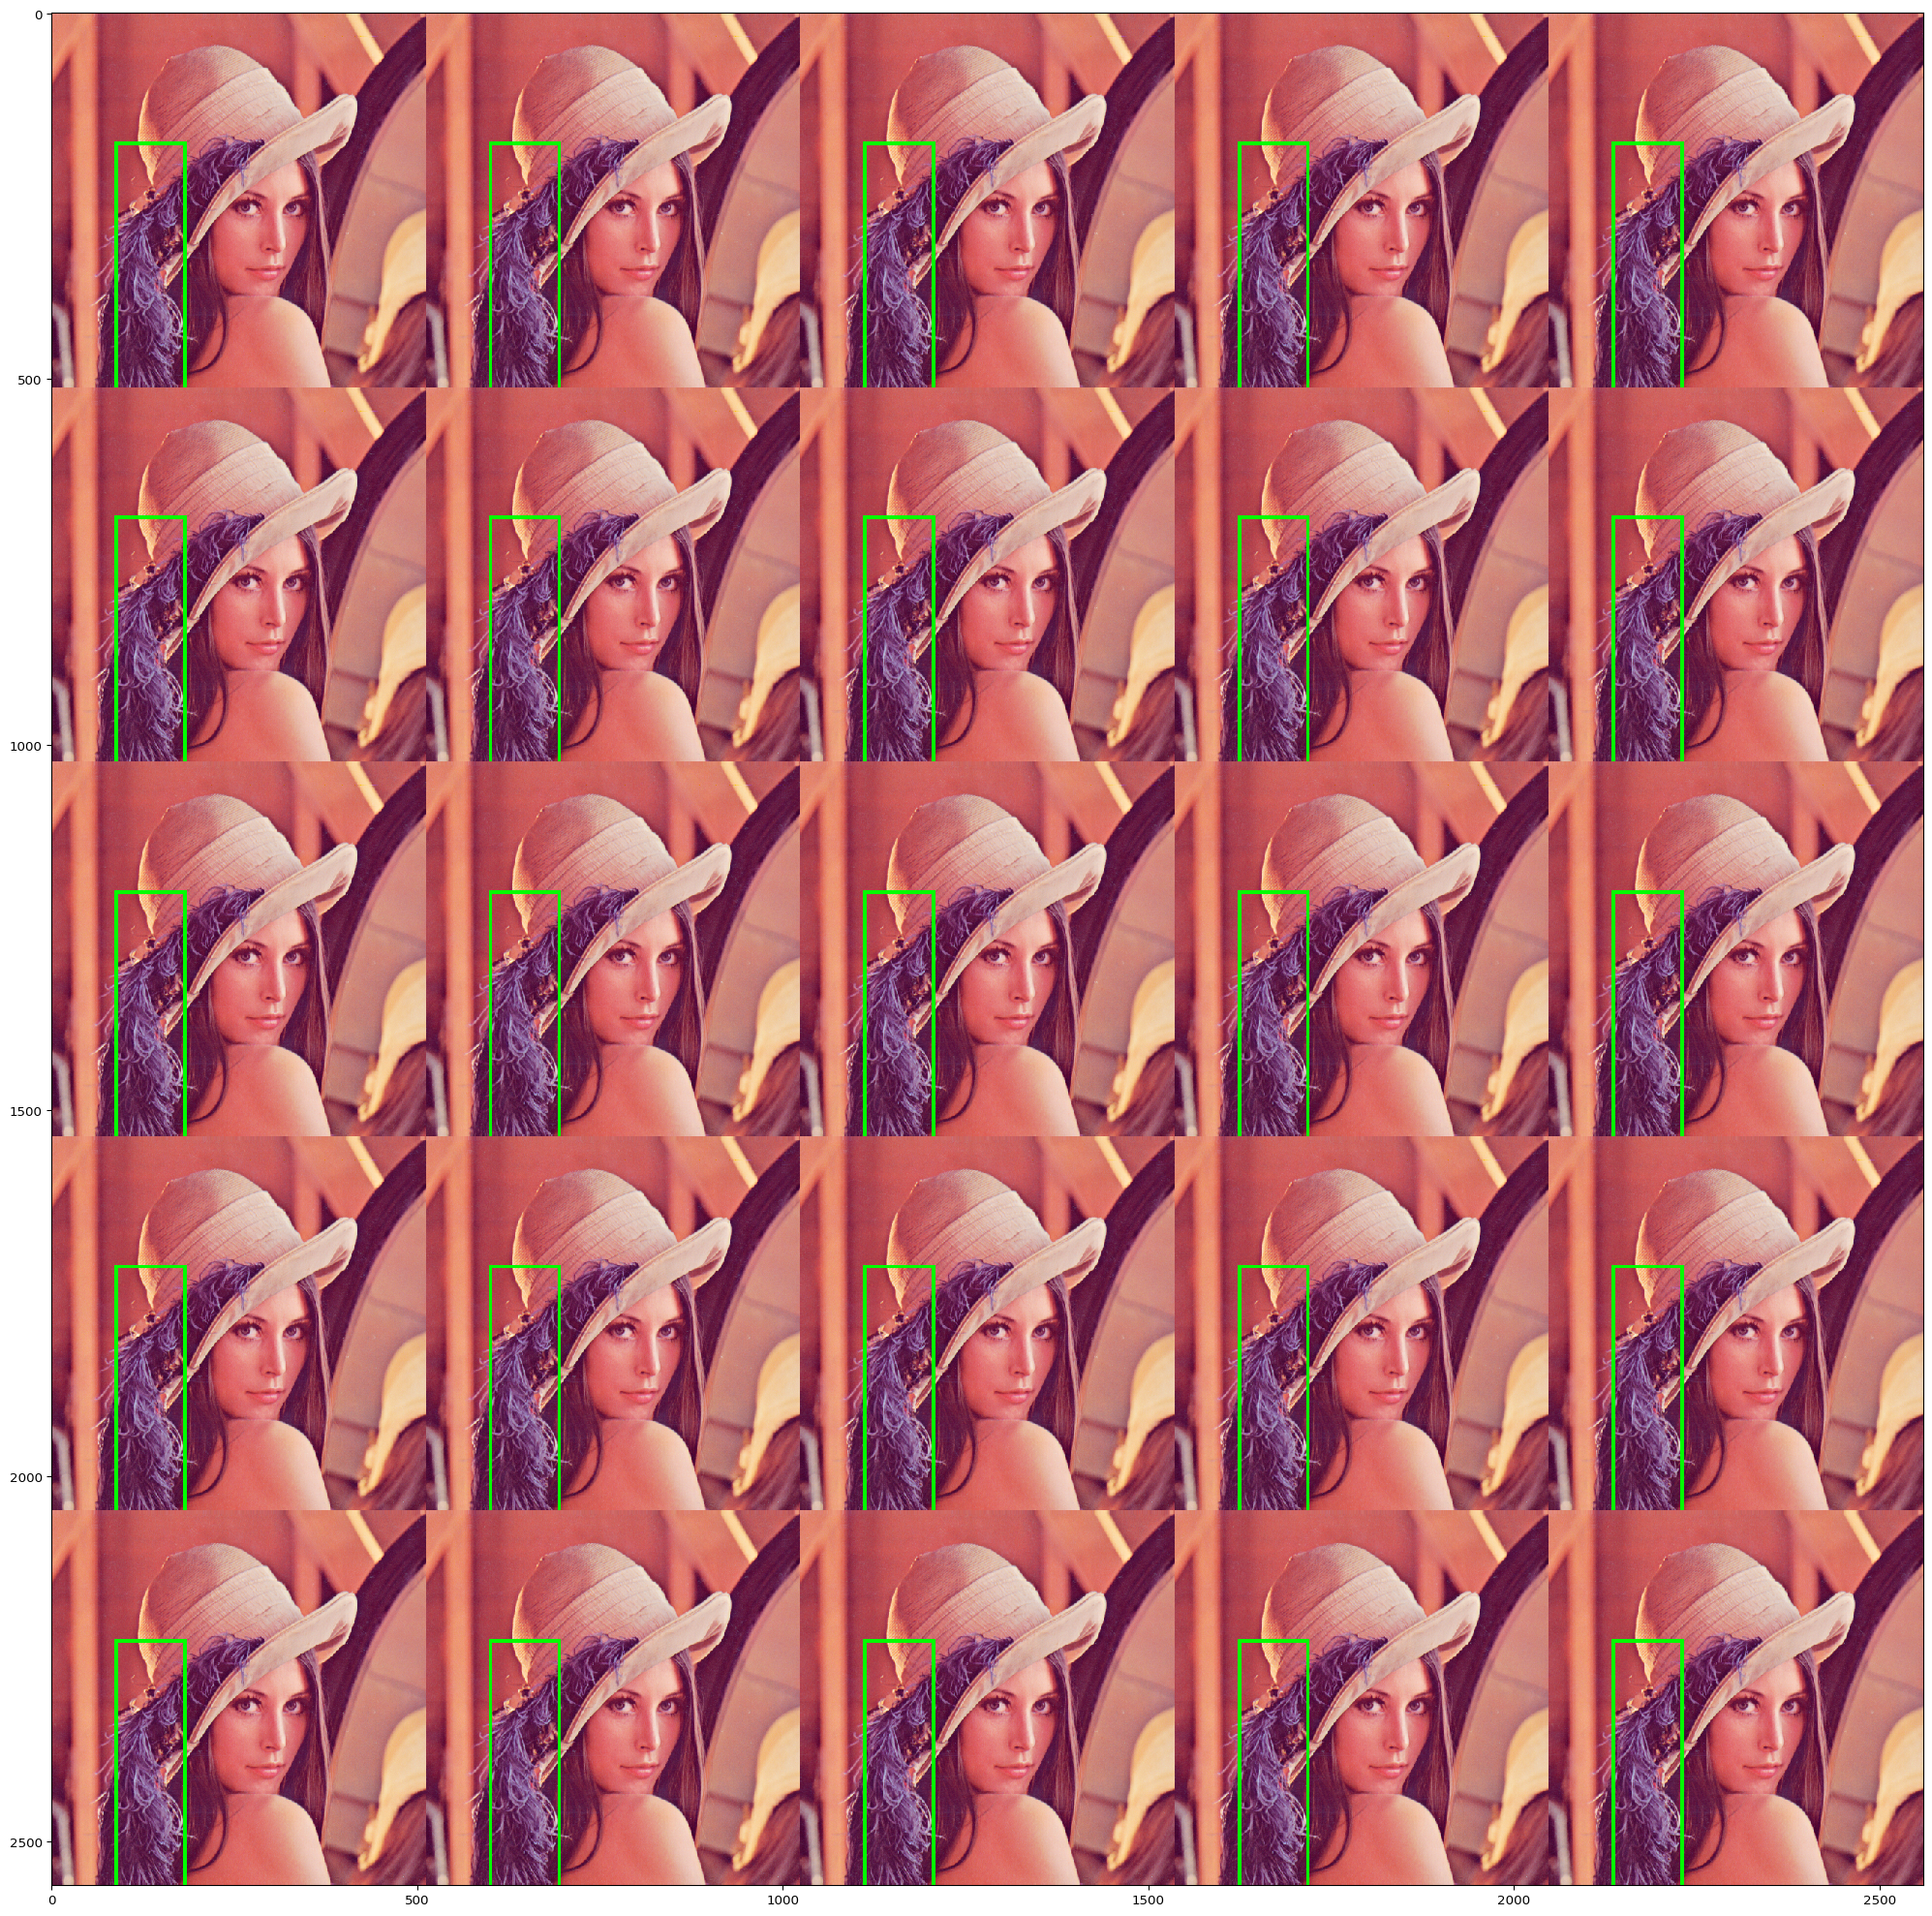

In [80]:
for i in range(1):
    l=[]
    images_aug, bbs_aug = seq(images=[image for j in range(5*5)], bounding_boxes=[bbs for j in range(5*5)])
    for j ,box in zip(images_aug,bbs_aug):
        xmin,ymin,xmax,ymax = box[0].x1,box[0].y1,box[0].x2,box[0].y2
        l.append(box[0].draw_on_image(j, size=5, color=[0, 255, 0]))
    imgaug.imshow(imgaug.draw_grid(l, cols=5, rows=5))